In [1]:
from rdkit import Chem
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scikit_posthocs as sp

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

In [3]:
df = pd.read_csv("ChEMBL_hERG.csv")

In [4]:
df.head()

,canonical_smiles,molregno,mol_chembl_id,standard_relation,standard_value,standard_type,standard_units,description,organism,assay_type,confidence_score,pref_name,tgt_chembl_id
0,COCC(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CCc4cc(F)ccc4[C@@H]1C(C)C,72035,CHEMBL45816,=,1430.0,IC50,nM,K+ channel blocking activity in COS-7 African green monkey kidney derived cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240
1,CC(C)COCC(CN(Cc1ccccc1)c2ccccc2)N3CCCC3,112651,CHEMBL1008,=,550.0,IC50,nM,K+ channel blocking activity in COS-7 African green monkey kidney derived cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240
2,COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc4C(=O)C(=CN(C5CC5)c14)C(=O)O,1788,CHEMBL32,=,129000.0,IC50,nM,K+ channel blocking activity in Chinese hamster ovary cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240
3,COc1c(N2CCNC(C)C2)c(F)cc3C(=O)C(=CN(C4CC4)c13)C(=O)O,1712,CHEMBL31,=,130000.0,IC50,nM,K+ channel blocking activity in Chinese hamster ovary cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240
4,CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3c(C)c2F)C4CC4,17136,CHEMBL583,=,104000.0,IC50,nM,K+ channel blocking activity in Chinese hamster ovary cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240


In [5]:
charge_df = pd.read_csv("ChEMBL_hERG_charge.csv")

In [6]:
charge_df.head()

,NAME,ACIDIC,BASIC,STATE_10,STATE_50,STATE_90
0,1,12.54,9.82,basic,basic,basic
1,2,NaN,9.16,basic,basic,basic
2,3,5.69,9.42,zwiterionic,zwiterionic,zwiterionic
3,4,5.69,8.73,zwiterionic,zwiterionic,zwiterionic
4,5,5.88,8.77,zwiterionic,zwiterionic,zwiterionic


In [7]:
df['NAME'] = range(1,df.shape[0]+1)

In [8]:
combo_df = df.merge(charge_df,on="NAME")

In [9]:
combo_df.head()

,canonical_smiles,molregno,mol_chembl_id,standard_relation,standard_value,standard_type,standard_units,description,organism,assay_type,confidence_score,pref_name,tgt_chembl_id,NAME,ACIDIC,BASIC,STATE_10,STATE_50,STATE_90
0,COCC(=O)O[C@]1(CCN(C)CCCc2nc3ccccc3[nH]2)CCc4cc(F)ccc4[C@@H]1C(C)C,72035,CHEMBL45816,=,1430.0,IC50,nM,K+ channel blocking activity in COS-7 African green monkey kidney derived cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240,1,12.54,9.82,basic,basic,basic
1,CC(C)COCC(CN(Cc1ccccc1)c2ccccc2)N3CCCC3,112651,CHEMBL1008,=,550.0,IC50,nM,K+ channel blocking activity in COS-7 African green monkey kidney derived cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240,2,NaN,9.16,basic,basic,basic
2,COc1c(N2C[C@@H]3CCCN[C@@H]3C2)c(F)cc4C(=O)C(=CN(C5CC5)c14)C(=O)O,1788,CHEMBL32,=,129000.0,IC50,nM,K+ channel blocking activity in Chinese hamster ovary cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240,3,5.69,9.42,zwiterionic,zwiterionic,zwiterionic
3,COc1c(N2CCNC(C)C2)c(F)cc3C(=O)C(=CN(C4CC4)c13)C(=O)O,1712,CHEMBL31,=,130000.0,IC50,nM,K+ channel blocking activity in Chinese hamster ovary cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240,4,5.69,8.73,zwiterionic,zwiterionic,zwiterionic
4,CC1CN(CCN1)c2cc3N(C=C(C(=O)O)C(=O)c3c(C)c2F)C4CC4,17136,CHEMBL583,=,104000.0,IC50,nM,K+ channel blocking activity in Chinese hamster ovary cells expressing HERG Kv11.1,Homo sapiens,F,9,HERG,CHEMBL240,5,5.88,8.77,zwiterionic,zwiterionic,zwiterionic


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Charge State')]

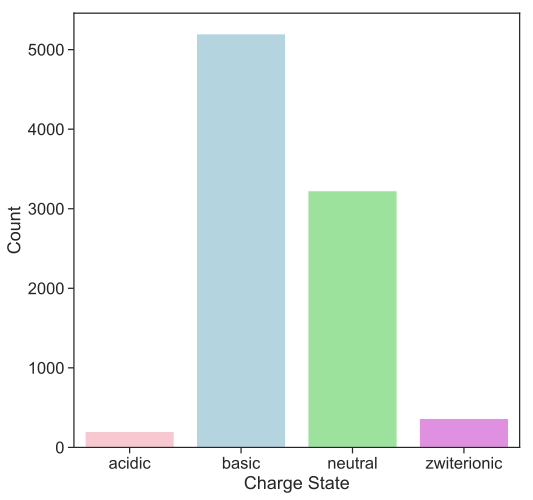

In [16]:
ab_order = ["acidic","basic","neutral","zwiterionic"]
ab_pal = ["pink","lightblue","lightgreen","violet"]
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax = sns.countplot(x="STATE_50",data=combo_df,palette=ab_pal,order=ab_order)
sns.set_style('ticks')
ax.set(xlabel="Charge State",ylabel="Count")



[Text(0, 0.5, 'IC50 $\\mu$M'), Text(0.5, 0, 'Charge State')]

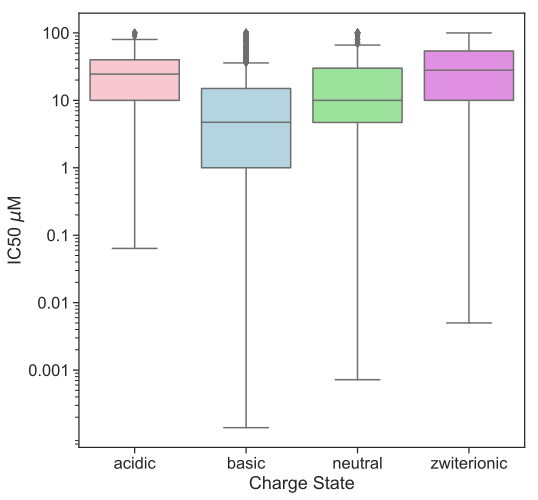

In [18]:
ax = sns.boxplot(x="STATE_50",y="IC50_uM",data=combo_df.query("IC50_uM < 100"),order=ab_order, palette=ab_pal)
sns.set(rc={'figure.figsize':(8,8)},font_scale=1.5)
sns.set_style('ticks')
ax.set(yscale="log")
ax.set_yticks([0.001,0.01,0.1, 1, 10, 100])
ax.set_yticklabels(["0.001","0.01","0.1","1","10","100"])
ax.set(xlabel="Charge State",ylabel="IC50 $\mu$M")

In [12]:
combo_df["IC50_uM"] = df.standard_value/1000.0

(<matplotlib.axes._subplots.AxesSubplot at 0x111edf358>,
 <matplotlib.colorbar.ColorbarBase at 0x112908ba8>)

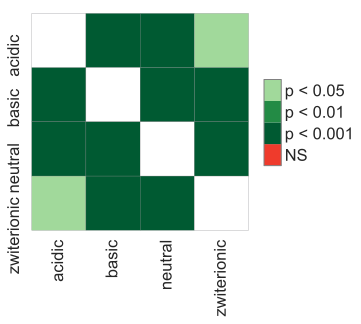

In [13]:
sns.set(rc={'figure.figsize':(6,4)},font_scale=1.5)
pc = sp.posthoc_mannwhitney(combo_df,val_col="IC50_uM",group_col="STATE_50",p_adjust='holm')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

[Text(0, 0.5, 'Fraction'), Text(0.5, 0, 'hERG IC50 ($\\mu$M)')]

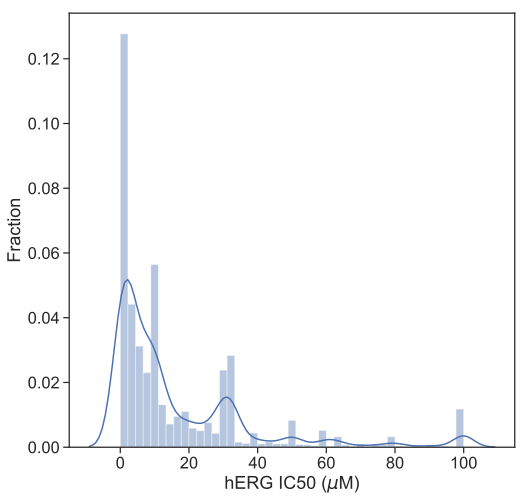

In [21]:
ax = sns.distplot(combo_df.query("IC50_uM < 100").IC50_uM)
ax.set(xlabel="hERG IC50 ($\mu$M)",ylabel="Fraction")